In [2]:
source('functions/man.plot.R')

In [3]:
height = read.csv('data/height_gwas.txt', sep = '\t', header = T)

In [6]:
man_data = man.data.frame(height)

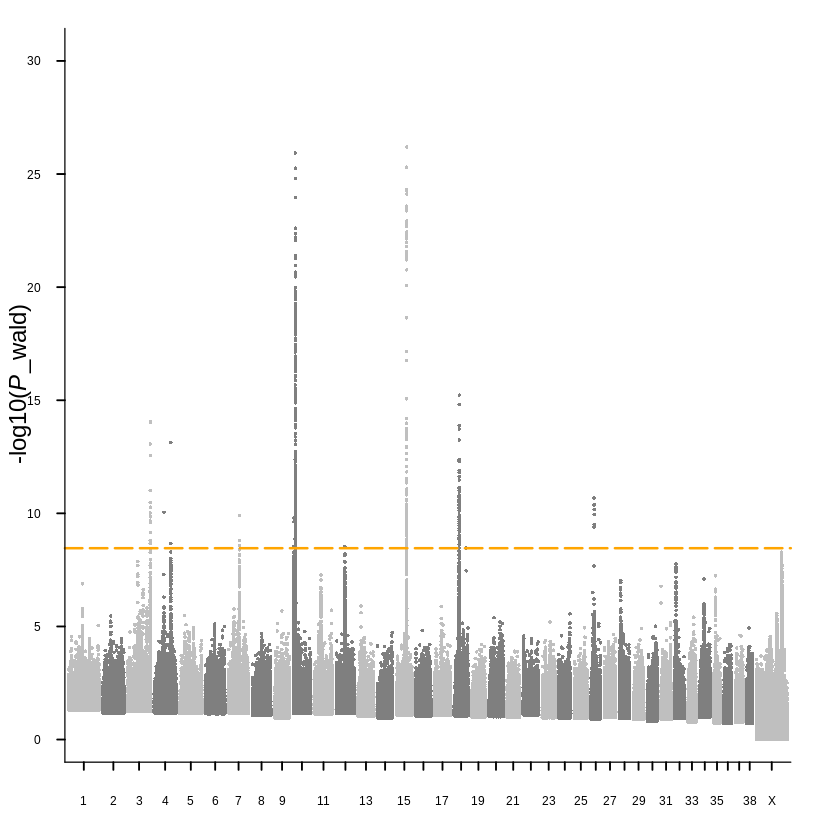

In [10]:
par(mar = c(3, 1.5, 0, 1))
man_plot = man.plot(man_data, threshold = 8.46)

In [ ]:
rm(man_data)
rm(man_plot)

In [12]:
png('plots/furnish.png', height = 600, width = 2000, units = 'px', pointsize = 30)

par(mar = c(3, 1.5, 0, 1))

man_plot = man.plot(man_data, threshold = 8.46)
man.highlight(man_plot, threshold = 8.46)
# man.label(man_plot)

dev.off()

png 
  2